# Assignment

# Objective of House_Prices prediction project:

#### Build a predictive modeling algorithm to prediction House_Prices  based on given input variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('House_Prices.csv')

In [3]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790.0,2,2,2,No,East
1,2,114200,2030.0,4,2,3,No,East
2,3,114800,1740.0,3,2,1,No,East
3,4,94700,1980.0,3,2,3,No,East
4,5,119800,2130.0,3,3,3,No,East


In [4]:
df.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

# Variable Description
#### * Target Variable(y):Price
#### * Independent variable(x):Home
#### * SqFt
#### * Bedrooms
#### * Bathrooms
#### * Offers
#### * Brick
#### * Neighborhood

In [5]:
df.tail()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
123,124,119700,1900.0,3,3,3,Yes,East
124,125,147900,2160.0,4,3,3,Yes,NaN
125,126,113500,2070.0,2,2,2,No,North
126,127,149900,2020.0,3,3,1,No,West
127,128,124600,2250.0,3,3,4,No,North


In [6]:
df.shape

(128, 8)

In [7]:
df.dtypes

Home              int64
Price             int64
SqFt            float64
Bedrooms          int64
Bathrooms         int64
Offers            int64
Brick            object
Neighborhood     object
dtype: object

In [8]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,127.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,1997.716535,3.023438,2.445312,2.578125
std,37.094474,26868.770371,209.235908,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [9]:
df.isnull().sum()

Home            0
Price           0
SqFt            1
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    1
dtype: int64

In [10]:
df['SqFt']=df['SqFt'].fillna(df['SqFt'].median())

In [11]:
df['Neighborhood']=df['Neighborhood'].fillna(df['Neighborhood'].mode().iloc[0]) # .iloc[0] retrieves the first mode (in case there are multiple modes).

In [12]:
df.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

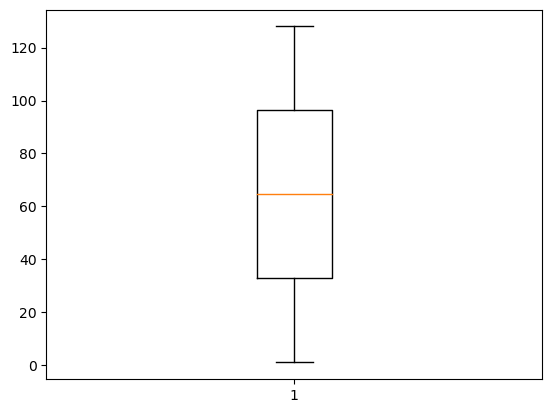

In [13]:
# check outlier in numeric columns
plt.boxplot(df['Home'])
plt.show()

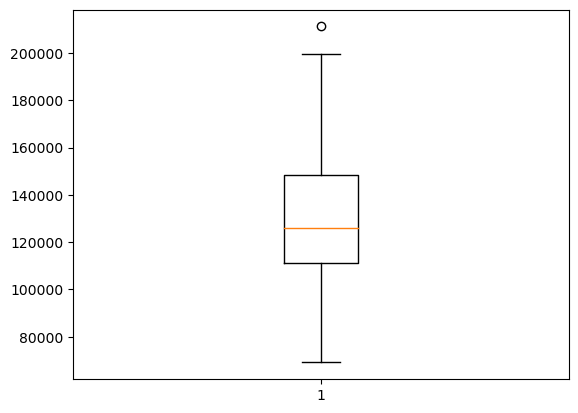

In [14]:
plt.boxplot(df['Price'])
plt.show()

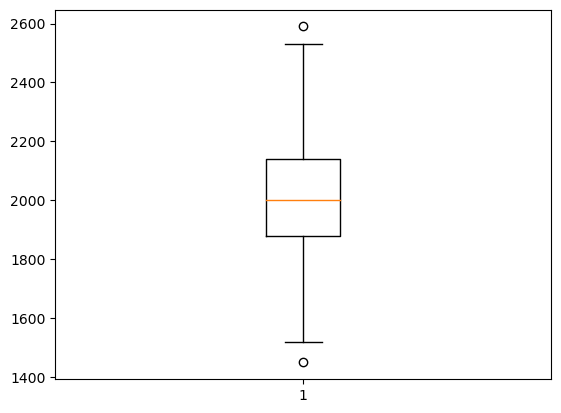

In [15]:
plt.boxplot(df['SqFt']) 
plt.show()

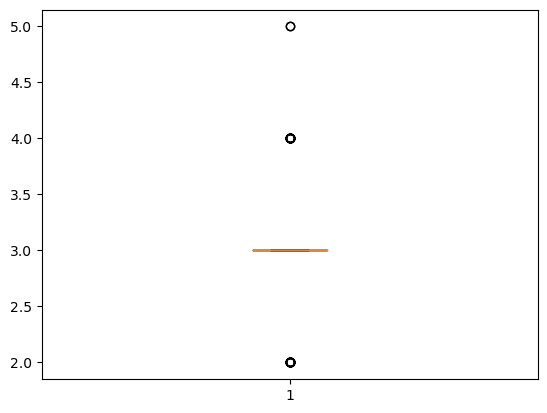

In [16]:
plt.boxplot(df['Bedrooms']) 
plt.show()

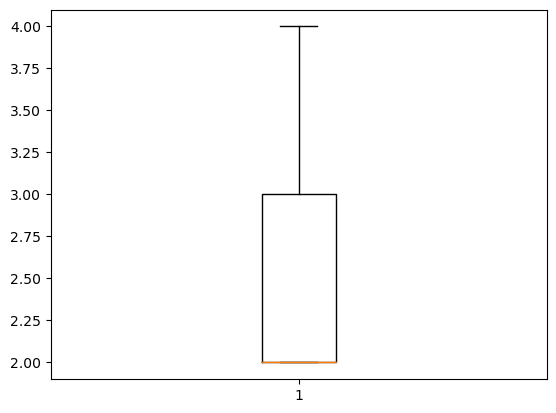

In [17]:
plt.boxplot(df['Bathrooms']) 
plt.show()

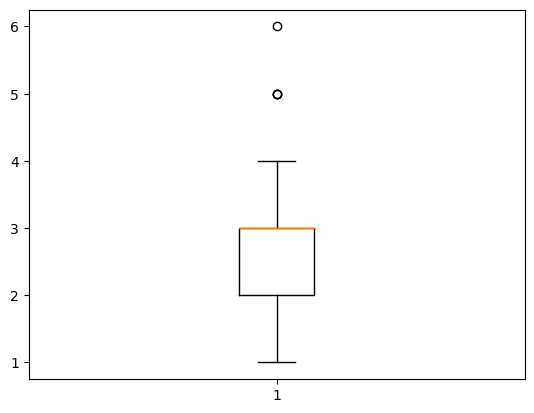

In [18]:

plt.boxplot(df['Offers']) 
plt.show()

In [19]:
def remove_outliers(d,c):
    # where d is the variable for dataframe and c is the variable for column
    
    #find q1 and q3
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    
    #calculate iqr(inter quaetile range)
    iqr=q3-q1
    
    # find upper bound (ub) and lower bound(lb)
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    # filter good data (i e eliminate outliers)
    data_without_outlier=d[(d[c]<=ub)&(d[c]>=lb)]
    
    return data_without_outlier
   

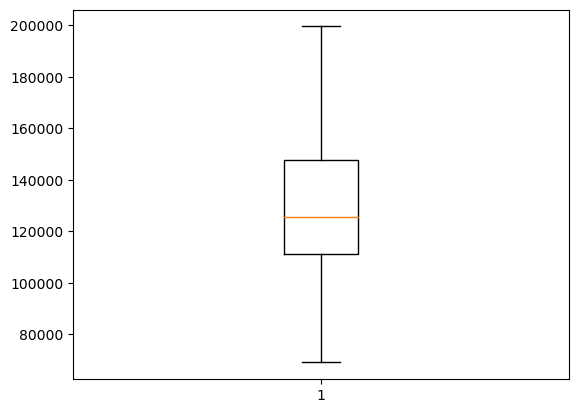

In [20]:
# remove outliers 
df1=remove_outliers(df,'Price')

plt.boxplot(df1['Price'])
plt.show()

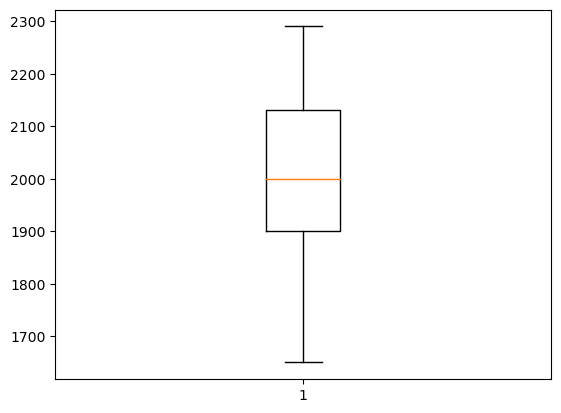

In [21]:
def remove_outliers(d,c):
    
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    
    iqr=q3-q1

    ub=q3+1*iqr
    lb=q1-1*iqr

    data_without_outlier=d[(d[c]<=ub)&(d[c]>=lb)]
    
    return data_without_outlier
   
df1=remove_outliers(df,'SqFt')

plt.boxplot(df1['SqFt'])
plt.show()

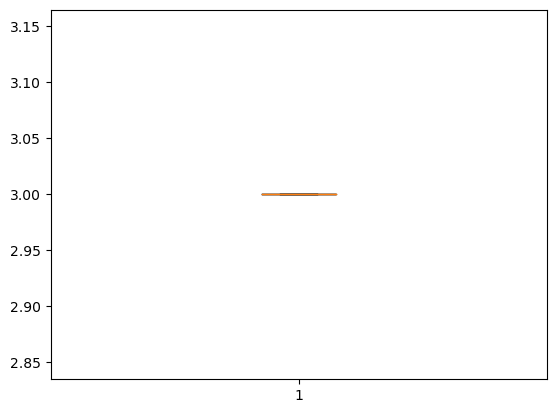

In [22]:
df1=remove_outliers(df,'Bedrooms')

plt.boxplot(df1['Bedrooms'])
plt.show()

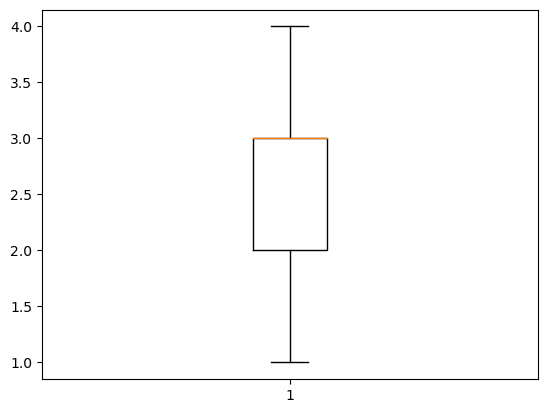

In [23]:
df1=remove_outliers(df,'Offers')

plt.boxplot(df1['Offers'])
plt.show()

# EDA
#### * Distribution  # for numerical variable
#### * Data Mix  # for catrgorical variable
#### * correlation

In [24]:
df1.columns # checking the data using eda

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [25]:
df1.shape

(124, 8)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13452\2160741303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Home'])


<Axes: xlabel='Home', ylabel='Density'>

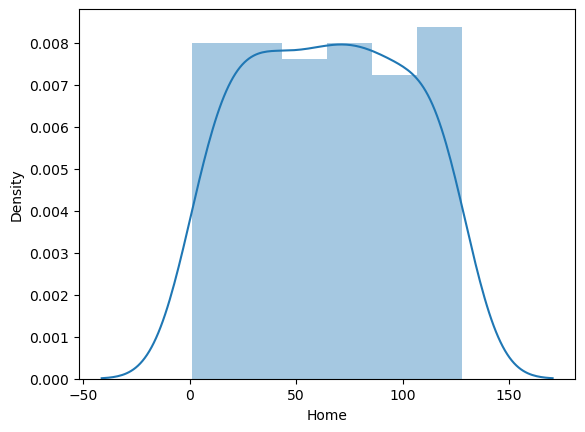

In [26]:
sns.distplot(df1['Home'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_13452\661677983.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

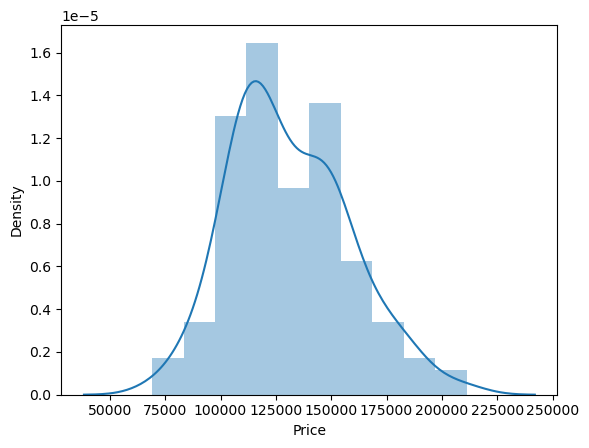

In [27]:
sns.distplot(df1['Price'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_13452\2634252032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['SqFt'])


<Axes: xlabel='SqFt', ylabel='Density'>

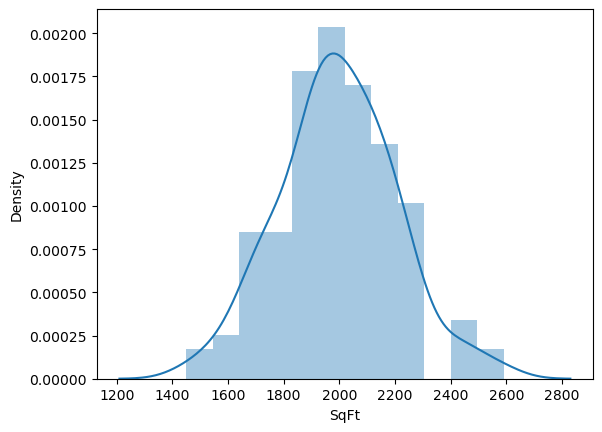

In [28]:
sns.distplot(df1['SqFt'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_13452\1223819973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Bathrooms'])


<Axes: xlabel='Bathrooms', ylabel='Density'>

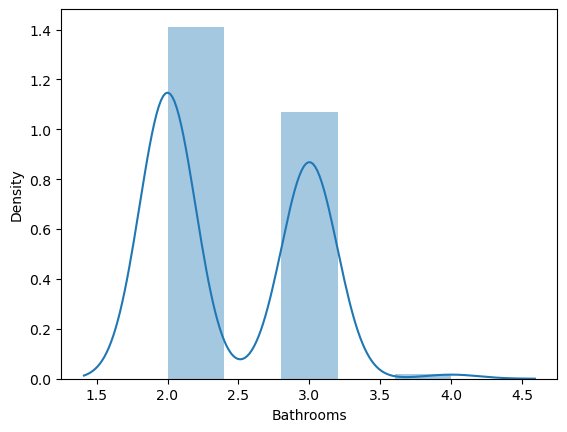

In [29]:
sns.distplot(df1['Bathrooms'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_13452\1657804145.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Bedrooms'])


<Axes: xlabel='Bedrooms', ylabel='Density'>

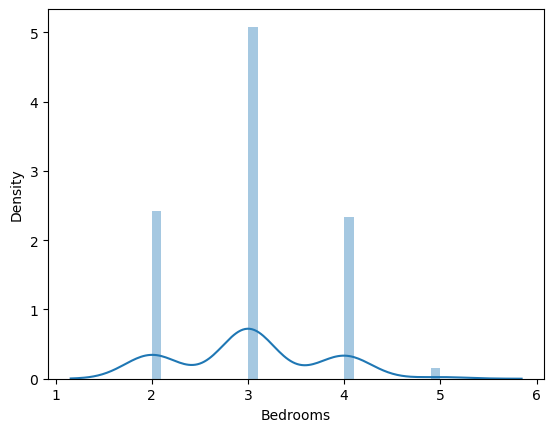

In [30]:
sns.distplot(df1['Bedrooms'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_13452\1336273101.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[ 'Offers'])


<Axes: xlabel='Offers', ylabel='Density'>

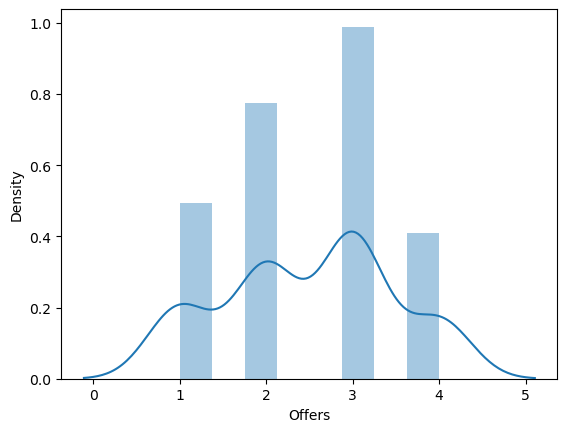

In [31]:
sns.distplot(df1[ 'Offers'])

In [32]:
# check data mix for categorical variable
# Bedrooms,Bathrooms,Offers

<Axes: xlabel='Bedrooms'>

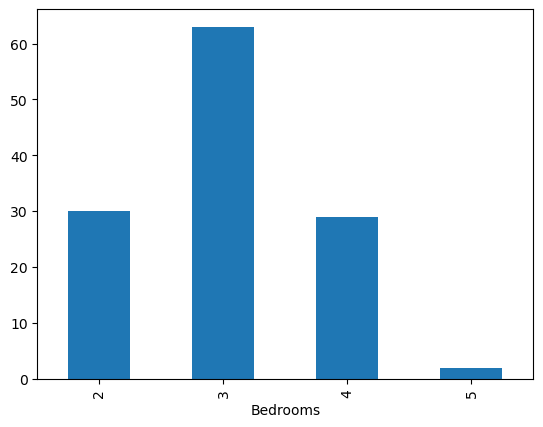

In [33]:
df1.groupby('Bedrooms')['Bedrooms'].count().plot(kind='bar')

<Axes: xlabel='Bathrooms'>

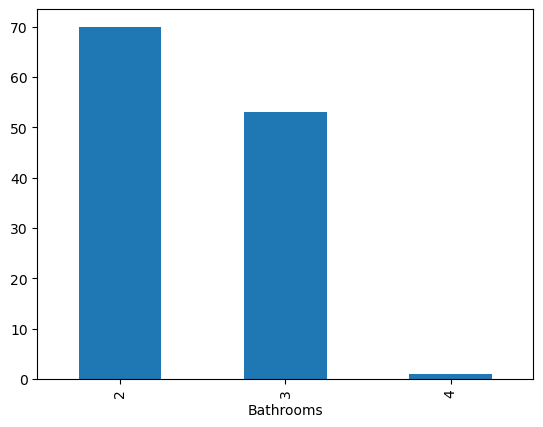

In [34]:
df1.groupby('Bathrooms')['Bathrooms'].count().plot(kind='bar')

<Axes: xlabel='Offers'>

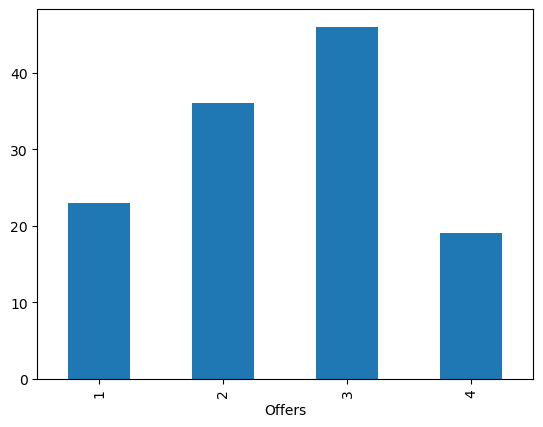

In [35]:
df1.groupby('Offers')['Offers'].count().plot(kind='bar')

# Pearson Correlation

In [36]:
# create a set of numeric columns
df1_numeric=df1.select_dtypes(include=['int64','float64'])
df1_numeric.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,1,114300,1790.0,2,2,2
1,2,114200,2030.0,4,2,3
2,3,114800,1740.0,3,2,1
3,4,94700,1980.0,3,2,3
4,5,119800,2130.0,3,3,3


In [37]:

df1_numeric=df1_numeric.drop(['Offers','Bedrooms','Bathrooms'],axis=1)
df1_numeric.head()

,Home,Price,SqFt
0,1,114300,1790.0
1,2,114200,2030.0
2,3,114800,1740.0
3,4,94700,1980.0
4,5,119800,2130.0


<Axes: >

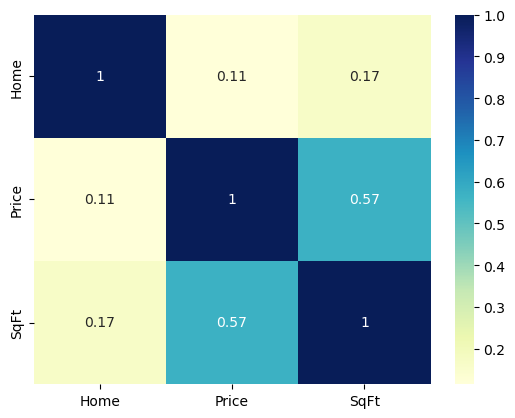

In [38]:
# create heat map
sns.heatmap(df1_numeric.corr(),cmap='YlGnBu',annot=True)

#### ---------End of EDA---------

In [39]:
# check if there is any problem in categorical variables.
# like spelling difference,case sensitive value ie,Male,male

In [40]:
df1.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [41]:
df1['Offers'].unique()

array([2, 3, 1, 4], dtype=int64)

In [42]:
df1['Bathrooms'].unique()

array([2, 3, 4], dtype=int64)

In [43]:
df1['Bedrooms'].unique()

array([2, 4, 3, 5], dtype=int64)

# Dummy Conversion

In [44]:
df1=df1.drop('Home',axis=1)

In [45]:
df1.dtypes

Price             int64
SqFt            float64
Bedrooms          int64
Bathrooms         int64
Offers            int64
Brick            object
Neighborhood     object
dtype: object

In [46]:
df1['Bathrooms']=df1['Bathrooms'].astype('object')
df1['Bedrooms']=df1['Bedrooms'].astype('object')
df1['Offers']=df1['Offers'].astype('object')
df1.dtypes

Price             int64
SqFt            float64
Bedrooms         object
Bathrooms        object
Offers           object
Brick            object
Neighborhood     object
dtype: object

In [47]:
df1_categorical=df1.select_dtypes(include='object')
df1_categorical.head()

,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,2,2,2,No,East
1,4,2,3,No,East
2,3,2,1,No,East
3,3,2,3,No,East
4,3,3,3,No,East


In [48]:
# dummy conversion
# we drop 1st index for removing dependence of independent variable(multicollinearity)
df1_dummy=pd.get_dummies(df1_categorical,drop_first=True)
df1_dummy.head()

,Bedrooms_3,Bedrooms_4,Bedrooms_5,Bathrooms_3,Bathrooms_4,Offers_2,Offers_3,Offers_4,Brick_Yes,Neighborhood_North,Neighborhood_West
0,False,False,False,False,False,True,False,False,False,False,False
1,False,True,False,False,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,False
4,True,False,False,True,False,False,True,False,False,False,False


In [53]:
# combine data from df1_numeric and df1_dummy
df1_final=pd.concat([df1_numeric,df1_dummy],axis=1)
df1_final.head()

,Home,Price,SqFt,Bedrooms_3,Bedrooms_4,Bedrooms_5,Bathrooms_3,Bathrooms_4,Offers_2,Offers_3,Offers_4,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1,114300,1790.0,False,False,False,False,False,True,False,False,False,False,False
1,2,114200,2030.0,False,True,False,False,False,False,True,False,False,False,False
2,3,114800,1740.0,True,False,False,False,False,False,False,False,False,False,False
3,4,94700,1980.0,True,False,False,False,False,False,True,False,False,False,False
4,5,119800,2130.0,True,False,False,True,False,False,True,False,False,False,False


In [57]:
# create x and y

x=df1_final.drop('Price',axis=1)

y=df1_final['Price']

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=999)

In [60]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(86, 13) (38, 13) (86,) (38,)


# Feature Selection

In [61]:
#  create a key_feature object to select the top k features

key_features=SelectKBest(score_func=f_regression,k=5) # to select 5 significant features

# fit the key features of training data and transform it
xtrain_selected=key_features.fit_transform(xtrain,ytrain)

# get the indices of the selected features
selected_indices=key_features.get_support(indices=True)

# get the indices of the selected features
selected_features=xtrain.columns[selected_indices]

In [62]:
selected_features

Index(['SqFt', 'Bedrooms_4', 'Bathrooms_3', 'Neighborhood_North',
       'Neighborhood_West'],
      dtype='object')

# Build Linear Regression Model

In [63]:
linreg=LinearRegression()


linreg.fit(xtrain_selected,ytrain)


linreg.score(xtrain_selected,ytrain)

0.6763157159268592

In [64]:
xtest_selected=xtest.iloc[:,selected_indices]
score=linreg.score(xtest_selected,ytest)
score

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.6838290175795345

In [66]:
predicted_price=linreg.predict(xtest_selected)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [67]:
print(predicted_price)

[ 92447.73349407 164976.25669693  95315.77656899 158284.15618878
 107743.96322699 104557.24869929 112777.29671446 146613.17845105
 150469.67598383 106150.60596314 132096.38931864  98183.81964391
 103919.90579376 124249.46901415 165932.27105524 115645.33978938
 126425.71292563 153019.04760598 171031.01429954 107743.96322699
 122337.44029753 143402.19627984 138646.39213182 118292.56126791
 151744.3617949  127468.62364138 111886.69211298 115424.51819299
 149162.55007321 153975.06196429 115645.33978938 123293.45465584
 122018.76884476 159558.84199986  99458.50545499 130017.99526354
 114051.98252553 151910.7271334 ]


In [68]:
# print B0(beta not-intercept)
linreg.intercept_ # B0

58603.1497437052

In [70]:
# print beta values
linreg.coef_  

array([    31.86714528,   1441.05114957,   7999.22641877, -14593.47707055,
        25231.75251183])